Number of principle components: 13


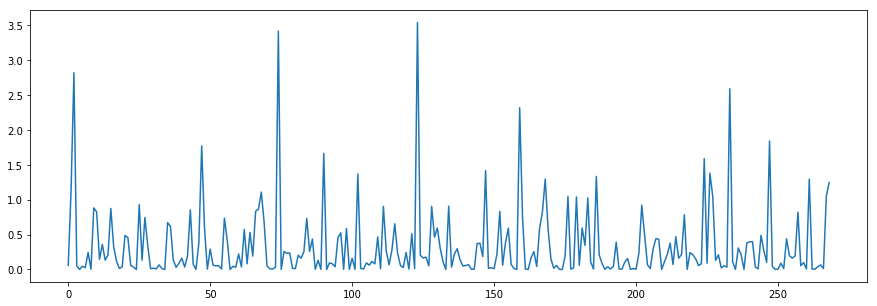

<Figure size 1800x720 with 0 Axes>

In [13]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun  1 09:10:11 2022

@author: Omar.BAYOMIE
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# def read_data(file_name):
#     """
#     Read the data from the file and return a dataframe.
#     """
#     df = pd.read_csv(file_name)
#     return df

# train_df = read_data('train_data.csv')
train_df = pd.read_csv('../heart.csv')
# train_df.index = pd.DatetimeIndex(train_df.index.values, freq = train_df.index.inferred_freq)

# train_df.drop('Id',axis=1,inplace=True)
# train_df.set_index('Timestamp', inplace=True)
# Normalization with zero mean and unit variance 
scaler = StandardScaler().fit(train_df)
train_norm = scaler.transform(train_df)

# function of deciding the number of eigenvalue to use for PCA
def percentage(eigenVals,percentage):  
    sortArray=np.sort(eigenVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray
        
# find the number of eigenvalues
covMat=np.cov(train_norm,rowvar=0)
eigenVals,eigenVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage(eigenVals,0.97)
print('Number of principle components:',num)    # PCs
#print 'array of eigenvalue:',sortArray        # variance

# the function of PCA. return the reconstructed data and principle eigenvectors.
def pca(newData,n):   
    covMat=np.cov(newData,rowvar=0)    #calculate covariance matrix  
    eigenVals,eigenVects=np.linalg.eig(np.mat(covMat))  
    eigenValIndice=np.argsort(eigenVals)             
    n_eigenValIndice=eigenValIndice[-1:-(n+1):-1]    
    n_eigenVect=eigenVects[:,n_eigenValIndice]         
    lowDDataMat=newData*n_eigenVect                
    reconMat=(lowDDataMat*n_eigenVect.T)  #reconstructed data 
    return n_eigenVect,reconMat  

PC, train_reconMat = pca(train_norm, num)


residual_pca1 = train_norm - train_reconMat
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[15,5])
plt.figure(figsize=[25,10])
ax.plot(residual_pca)
